<a href="https://colab.research.google.com/github/juliathemelo/machine_learning_pygil-Projeto3/blob/master/projeto3_pygil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importação das bibliotecas básicas**

In [7]:
!pip install plotly --upgrade
!pip install pandasql --upgrade

In [8]:
import pandas as pd
import pandasql as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import io
import requests
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
!pip install --upgrade category_encoders
import category_encoders as ce

# **Gerando gráficos**

In [9]:
sns.countplot(x = df['natureza_acidente']);

NameError: ignored

In [10]:
grafico = px.scatter_matrix(df, dimensions=['tipo', 'vitimas'])
grafico.show()

NameError: ignored

In [ ]:
grafico = px.scatter_matrix(df, dimensions=['tipo', 'vitimas'])
grafico.show()

In [ ]:
%matplotlib inline
dados.hist(column="Ano do Acidente",by="Turno")

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Limpando o dataset**

Processo para recuperação de valores exclusivamente necessários para a analise do projeto.

* Indentificar e retificar a tabela retirando valores nulos e informações sem abrangencia para o artigo.

* Criar filtros para facilitar a exploração dos dados









# **Tratamento da tabela com os dados de 2019 a 2021**

Carregando tabelas e unindo

In [11]:
url1 = requests.get("https://raw.githubusercontent.com/juliathemelo/machine_learning_pygil-Projeto3/master/datasets/acidentes-2019.csv").content
df_2019= pd.read_csv(io.StringIO(url1.decode('utf-8')))
url2 = requests.get("https://raw.githubusercontent.com/juliathemelo/machine_learning_pygil-Projeto3/master/datasets/acidentes_2020.csv").content
df_2020= pd.read_csv(io.StringIO(url2.decode('utf-8')),sep=";")
url3 = requests.get("https://raw.githubusercontent.com/juliathemelo/machine_learning_pygil-Projeto3/master/datasets/acidentes2021.csv").content
df_2021 = pd.read_csv(io.StringIO(url3.decode('utf-8')))

In [12]:
df_2019.drop(columns=['Unnamed: 25'], inplace=True)

In [13]:

df = pd.concat([df_2019,df_2020,df_2021])

In [14]:
df.columns.is_unique
df.columns.duplicated()
df.loc[:, ~df.columns.duplicated()]

,data,hora,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano
0,01/01/2019,00:41:00,SEM VÍTIMA,IPSEP,AV RECIFE,COLISÃO TRASEIRA,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019
1,01/01/2019,01:37:00,SEM VÍTIMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,2019
2,01/01/2019,14:20:00,SEM VÍTIMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,01/01/2019,02:53:00,SEM VÍTIMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,01/01/2019,08:17:00,COM VÍTIMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO COM CICLISTA,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,31/07/2021,14:30:00,COM VÍTIMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO LATERAL,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,2021
1314,31/07/2021,15:39:00,COM VÍTIMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO LATERAL,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,2021
1315,31/07/2021,16:24:00,COM VÍTIMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO TRASEIRA,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,NaN,Perfeito estado,Seca,Perfeito estado,NaN,NaN,NaN,2021
1316,31/07/2021,20:19:00,COM VÍTIMA,ALTO JOSÉ BONIFÁCIO,RUA ALTO JOSE BONIFACIO,COLISÃO FRONTAL,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,2021


In [15]:
df['natureza_acidente'].value_counts()


SEM VÍTIMA         12439
COM VÍTIMA          4971
VÍTIMA FATAL          55
ENTRADA E SAÍDA        1
APOIO                  1
Name: natureza_acidente, dtype: int64

Apagando datas nulas

In [16]:
horasnulas = df[df['hora'].isnull() == True]
# df.drop(horasnulas, axis=0, inplace= True)

df.loc[(df['hora'].isnull() == True), 'hora'] = '00:00:00'

Unindo data e hora e apagando a coluna "hora"

In [17]:
data = df['data'] +' ' + df['hora']
df['data'] = pd.to_datetime(data, errors='coerce')

In [18]:
df.drop(columns=['hora'], inplace=True)

Verificando datas nulas 

In [19]:
df.loc[(df['data'].isnull() == True), 'data'] = 'NÃO INFORMADO'

###Verificando endereço e bairros vazios

In [20]:

df.loc[(df['bairro'].isnull() == True) | (df['endereco'].isnull() == True), 'bairro'] = 'NÃO INFORMADO'
df.loc[(df['bairro'] == 'NÃO INFORMADO') & (df['endereco'].isnull() == True), 'endereco'] = 'NÃO INFORMADO'

In [21]:
df['auto'] = df['auto'].replace(np.nan, 0.0)
df['moto'] = df['moto'].replace(np.nan, 0.0)
df['ciclista'] = df['ciclista'].replace(np.nan, 0.0)
df['pedestre'] = df['pedestre'].replace(np.nan, 0.0)
df['onibus'] = df['onibus'].replace(np.nan, 0.0)
df['caminhao'] = df['caminhao'].replace(np.nan, 0.0)
df['viatura'] = df['viatura'].replace(np.nan, 0.0)
df['outros'] = df['outros'].replace(np.nan, 0.0)
df['vitimas'] = df['vitimas'].replace(np.nan, 0.0)
df['vitimas_fatais'] = df['vitimas_fatais'].replace(np.nan, 0.0)

#### Formatação da natureza do acidente (verificação e substituição)

In [22]:
df.loc[(df['vitimas'] < 1) & (df['vitimas_fatais']  < 1), 'natureza_acidente'] = "SEM VITÍMA"
df.loc[(df['vitimas'] >= 1) & (df['vitimas_fatais']  < 1), 'natureza_acidente'] = "COM VITÍMA"
df.loc[(df['vitimas_fatais'] > 0), 'natureza_acidente'] = "VÍTIMA FATAL"

#### Formatação dos tipos de acidente

In [23]:
df['tipo'] = df['tipo'].replace(['COLISÃO TRASEIRA','COLISÃO FRONTAL','COLISÃO LATERAL','COLISÃO COM CICLISTA','COLISÃO TRANSVERSAL'],'COLISÃO')

df['tipo']= df['tipo'].replace(['ATROPELAMENTO DE PESSOA'],['ATROPELAMENTO'])

df['tipo'].mode()
df.loc[df['tipo'].isnull() == True, 'tipo'] = 'COLISÃO'

#### Convertendo valores nulos das tabelas de float para 0

In [24]:
df.loc[(df['tempo_clima'].isnull() == True), 'tempo_clima'] = "Sem informação"
df.loc[(df['situacao_semaforo'].isnull() == True), 'situacao_semaforo'] = "Não existe"
df.loc[(df['sinalizacao'].isnull() == True) | (df['sinalizacao'] == "Não existe"), 'sinalizacao'] = "Não existente"
df.loc[(df['condicao_via'].isnull() == True), 'condicao_via'] = "Outros"
df.loc[(df['conservacao_via'].isnull() == True), 'conservacao_via'] = "Outros"
df.loc[(df['ponto_controle'].isnull() == True), 'ponto_controle'] = "Não existe"
df.loc[(df['situacao_placa'].isnull() == True), 'situacao_placa'] = "Não há placas"
df.loc[(df['velocidade_max_via'].isnull() == True), 'velocidade_max_via'] = "Não há placas"


df.loc[(df['ano'] != '2019') & (df['ano']  != 2020) & (df['ano']  != 2021), 'ano'] = 2021
df.condicao_via.value_counts()

Seca               12518
Outros              3505
Molhada             1425
Perfeito estado       11
Oleosa                11
Ilegível               2
Name: condicao_via, dtype: int64

###Tratando dados incoerentes

In [25]:
df

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano
0,2019-01-01 00:41:00,SEM VITÍMA,IPSEP,AV RECIFE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019
1,2019-01-01 01:37:00,SEM VITÍMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,Não há placas,2019
2,2019-01-01 14:20:00,SEM VITÍMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019
3,2019-01-01 02:53:00,SEM VITÍMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021
1316,2021-07-31 20:19:00,COM VITÍMA,ALTO JOSÉ BONIFÁCIO,RUA ALTO JOSE BONIFACIO,COLISÃO,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021


In [26]:
df.loc[(df['auto'] == 'COLISÃO TRASEIRA'), 'auto'] = 0.0
df.loc[(df['auto'] == 'COLISÃO FRONTAL'), 'auto'] = 0.0
df.loc[(df['auto'] == 'ABALROAMENTO TRANSVERSAL'), 'auto'] = 0.0
df.loc[(df['auto'] == 'ABALROAMENTO LONGITUDINAL'), 'auto'] = 0.0

In [27]:
df.loc[(df['situacao_semaforo'] == 'Bom'), 'situacao_semaforo'] = "Sem defeito"
df.loc[(df['situacao_semaforo'] == 'Nublado'), 'situacao_semaforo'] = "Sem defeito"


In [28]:
df.loc[(df['sinalizacao'] == 'Sem defeito'), 'sinalizacao'] = "Não existente"

In [29]:
df.loc[(df['condicao_via'] == 'Ilegível'), 'condicao_via'] = "Outros"

In [30]:
df.loc[(df['conservacao_via'] == 'Seca'), 'conservacao_via'] = "Outros"
df.loc[(df['conservacao_via'] == 'Molhada'), 'conservacao_via'] = "Outros"

In [31]:
df.loc[(df['ponto_controle'] == 'Perfeito estado'), 'ponto_controle'] = "Não existe"
df.loc[(df['ponto_controle'] == 'Mal iluminada'), 'ponto_controle'] = "Não existe"

In [32]:
df.loc[(df['situacao_placa'] == 'Outros'), 'situacao_placa'] = "Não há placas"
df.loc[(df['situacao_placa'] == 'Não existe'), 'situacao_placa'] = "Não há placas"

In [33]:
df.loc[(df['velocidade_max_via'] == '60KM'), 'velocidade_max_via'] = "60 km/h"
df.loc[(df['velocidade_max_via'] == '60km'), 'velocidade_max_via'] = "60 km/h"
df.loc[(df['velocidade_max_via'] == '60 KM/H'), 'velocidade_max_via'] = "60 km/h"
df.loc[(df['velocidade_max_via'] == '60km/h'), 'velocidade_max_via'] = "60 km/h"
df.loc[(df['velocidade_max_via'] == '40KM'), 'velocidade_max_via'] = "40 km/h"
df.loc[(df['velocidade_max_via'] == '40km'), 'velocidade_max_via'] = "40 km/h"
df.loc[(df['velocidade_max_via'] == '30 e 40 km/h'), 'velocidade_max_via'] = "40 km/h"
df.loc[(df['velocidade_max_via'] == '40km/h'), 'velocidade_max_via'] = "40 km/h"
df.loc[(df['velocidade_max_via'] == '30KM'), 'velocidade_max_via'] = "30 km/h"
df.loc[(df['velocidade_max_via'] == '20km'), 'velocidade_max_via'] = "20 km/h"
df.loc[(df['velocidade_max_via'] == 'n/i'), 'velocidade_max_via'] = "N/I"
df.loc[(df['velocidade_max_via'] == 'Placas Pare'), 'velocidade_max_via'] = "Outras"
df.loc[(df['velocidade_max_via'] == 'R-6a'), 'velocidade_max_via'] = "Outras"


### Tentar dividir os bairros de acordo com a Região Político Administrativa(RPA)

Tratando valores de bairros inconsistentes 

In [34]:
df.loc[df['bairro'] == 'JOANA BEZERRA', 'bairro'] = 'ILHA JOANA BEZERRA'
df.loc[df['bairro'] == 'BOMBA DO HEMETERIO', 'bairro'] = 'BOMBA DO HEMETÉRIO'

Armazenando os bairros em listas de suas respectivas RPA

In [35]:
zona_centro = ['BOA VISTA', 'CABANGA', 'COELHOS', 'ILHA DO LEITE',  'ILHA JOANA BEZERRA',  'PAISSANDU',   'BAIRRO DO RECIFE',  'SANTO AMARO',   'SANTO ANTÔNIO', 'SÃO JOSÉ', 'SOLEDADE']
zona_norte = ['ÁGUA FRIA', 'ALTO SANTA TERESINHA', 'ARRUDA',  'BEBERIBE',  'BOMBA DO HEMETÉRIO',  'CAJUEIRO', 'CAMPINA DO BARRETO', 'CAMPO GRANDE',
     'DOIS UNIDOS', 'ENCRUZILHADA', 'FUNDÃO',   'HIPÓDROMO',  'LINHA DO TIRO', 'PEIXINHOS', 'PONTO DE PARADA', 'PORTO DA MADEIRA',   'ROSARINHO', 'TORREÃO']
zona_noroeste =[ 'AFLITOS',
     'ALTO DO MANDU',
     'ALTO JOSÉ BONIFÁCIO',
     'ALTO JOSÉ DO PINHO',
     'APIPUCOS',
     'BREJO DA GUABIRABA',
     'BREJO DE BEBERIBE',
     'CASA AMARELA',
     'CASA FORTE',
     'CÓRREGO DO JENIPAPO',
     'DERBY',
     'DOIS IRMÃOS',
     'ESPINHEIRO',
     'GRAÇAS',
     'GUABIRABA',
     'JAQUEIRA',
     'MACAXEIRA',
     'MANGABEIRA',
     'MONTEIRO',
     'MORRO DA CONCEIÇÃO',
     'NOVA DESCOBERTA',
     'PARNAMIRIM',
     'PASSARINHO',
     'PAU-FERRO',
     'POÇO DA PANELA',
     'SANTANA',
     'SÍTIO DOS PINTOS',
     'TAMARINEIRA',
     'VASCO DA GAMA'
]
zona_oeste =[
'CAXANGÁ',
     'CIDADE UNIVERSITÁRIA',
     'CORDEIRO',
     'ENGENHO DO MEIO',
     'ILHA DO RETIRO',
     'IPUTINGA',
     'MADALENA',
     'PRADO',
     'TORRE',
     'TORRÕES',
     'VÁRZEA',
     'ZUMBI'
     ]
zona_sul =[  
'BOA VIAGEM', 'BRASÍLIA TEIMOSA','COHAB','IBURA','IMBIRIBEIRA','IPSEP','JORDÃO','PINA'
]
zona_sudoeste =[  
'AFOGADOS',
     'AREIAS',
     'BARRO',
     'BONGI',
     'CAÇOTE',
     'COQUEIRAL',
     'CURADO',
     'ESTÂNCIA',
     'JARDIM SÃO PAULO',
     'JIQUIÁ',
     'MANGUEIRA',
     'MUSTARDINHA',
     'SAN MARTIN',
     'SANCHO',
     'TEJIPIÓ',
     'TOTÓ'
]

Adicionando coluna RPA no dataframe

In [36]:

df.loc[:, 'rpa'] = 0
df


,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
0,2019-01-01 00:41:00,SEM VITÍMA,IPSEP,AV RECIFE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019,0
1,2019-01-01 01:37:00,SEM VITÍMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,Não há placas,2019,0
2,2019-01-01 14:20:00,SEM VITÍMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,0
3,2019-01-01 02:53:00,SEM VITÍMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,0
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,0
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,0
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,0
1316,2021-07-31 20:19:00,COM VITÍMA,ALTO JOSÉ BONIFÁCIO,RUA ALTO JOSE BONIFACIO,COLISÃO,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,0


Criando uma função para fazer a verificação e preenchimento da zona

In [37]:
zonas = [zona_centro, zona_noroeste, zona_norte, zona_oeste, zona_sudoeste, zona_sul]

def select_rpa(data, lista):
  if data in lista[0]:
    return "CENTRO"
  elif data in lista[1]:
    return "NOROESTE"
  elif data in lista[2]:
    return "NORTE"  
  elif data in lista[3]:
    return "OESTE" 
  elif data in lista[4]:
    return "SUDOESTE" 
  elif data in lista[5]:
    return "SUL" 
  else:
    return 0


df['rpa'] = df['bairro'].map(lambda x:  select_rpa(x, zonas))
df

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
0,2019-01-01 00:41:00,SEM VITÍMA,IPSEP,AV RECIFE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019,SUL
1,2019-01-01 01:37:00,SEM VITÍMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,Não há placas,2019,SUL
2,2019-01-01 14:20:00,SEM VITÍMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
3,2019-01-01 02:53:00,SEM VITÍMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NOROESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NOROESTE
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,SUL
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NORTE
1316,2021-07-31 20:19:00,COM VITÍMA,ALTO JOSÉ BONIFÁCIO,RUA ALTO JOSE BONIFACIO,COLISÃO,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NOROESTE


# **Exploração dos dados**

### Comparação de acidentes com vitimas fatais e sem vitimas fatais

In [38]:
vitimas_f = df.query('natureza_acidente == "VÍTIMA FATAL"')
vitimas_f.head(5)

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
38,2019-02-01 15:32:00,VÍTIMA FATAL,BONGI,EST DO BONGI,COLISÃO,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Bom,Sem defeito,Perfeito estado,Seca,Mal conservada,Outros,Não há placas,Não há placas,2019,SUDOESTE
96,2019-04-01 22:12:00,VÍTIMA FATAL,AFOGADOS,RUA COSME VIANA,ATROPELAMENTO,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,R-32,Não há placas,2019,SUDOESTE
529,2019-01-21 16:50:00,VÍTIMA FATAL,TORRE,RUA COMPOSITOR JOAO SANTIAGO,ATROPELAMENTO,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2019,OESTE
929,2019-05-02 05:33:00,VÍTIMA FATAL,TEJIPIÓ,AV DR JOSE RUFINO,COLISÃO,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Chuvoso,Não existe,Não existente,Molhada,Outros,Não existe,Outras,Não há placas,2019,SUDOESTE
932,2019-05-02 08:17:00,VÍTIMA FATAL,BEBERIBE,AV BEBERIBE,ABALROAMENTO LONGITUDINAL,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2019,NORTE


In [39]:
vitimas_n = df.query('natureza_acidente == "COM VITÍMA"')
vitimas_n.head()

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NOROESTE
5,2019-01-01 09:30:00,COM VITÍMA,IBURA,AV DOIS RIOS,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,30 km/h,2019,SUL
6,2019-01-01 09:54:00,COM VITÍMA,SAN MARTIN,AV GENERAL SAN MARTIN,CHOQUE OBJETO FIXO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Outros,R-6a,40 km/h,2019,SUDOESTE
9,2019-01-01 16:01:00,COM VITÍMA,CAMPO GRANDE,EST DE BELEM,ATROPELAMENTO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,NORTE
12,2019-01-01 20:30:00,COM VITÍMA,ESTÂNCIA,AV DR JOSE RUFINO,COLISÃO,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Outras,Não há placas,2019,SUDOESTE


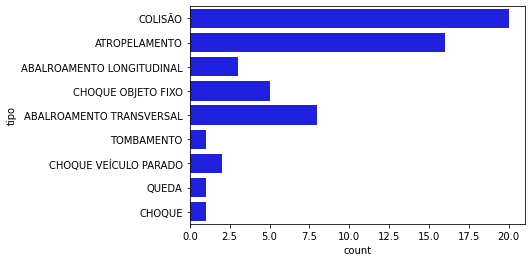

In [40]:
sns.countplot(y = vitimas_f['tipo'], color='blue');


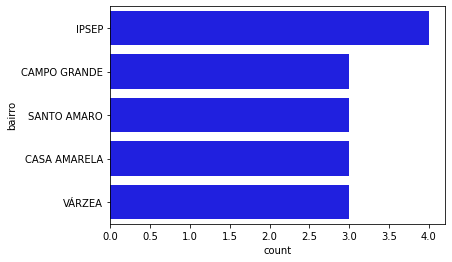

In [41]:
sns.countplot(y = vitimas_f['bairro'], color="blue", order=vitimas_f.bairro.value_counts().iloc[:5].index);

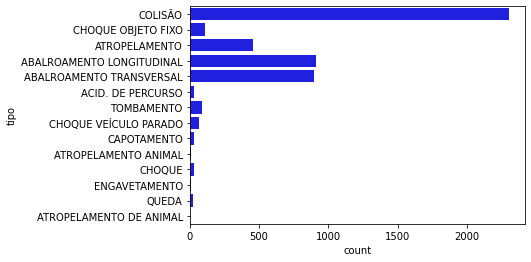

In [42]:
sns.countplot(y = vitimas_n['tipo'], color="blue");

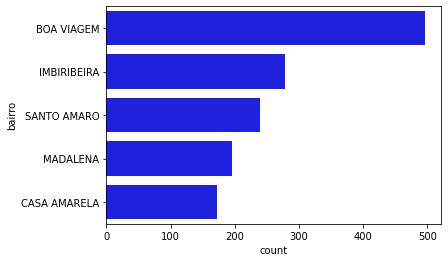

In [43]:
sns.countplot(y = vitimas_n['bairro'], color='blue', order=vitimas_n.bairro.value_counts().iloc[:5].index);

### Exploração de acidentes ocassionados pela falta de manuntenção das vias que influenciam nos acidentes

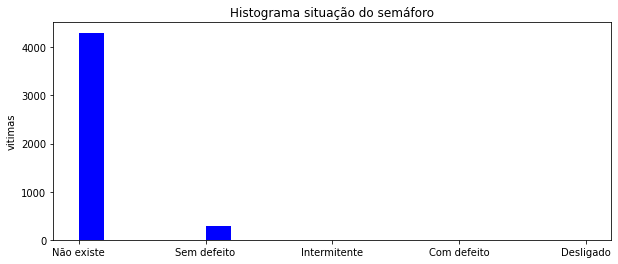

In [46]:
vias = df.loc[(df['conservacao_via'] != 'Perfeito estado')]

_ = plt.figure(figsize=(10, 4))
_ = plt.hist(data=vias, x="situacao_semaforo", bins=20, rwidth=1,  color="blue")
_ = plt.ylabel("vitimas")
_ = plt.title("Histograma situação do semáforo")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

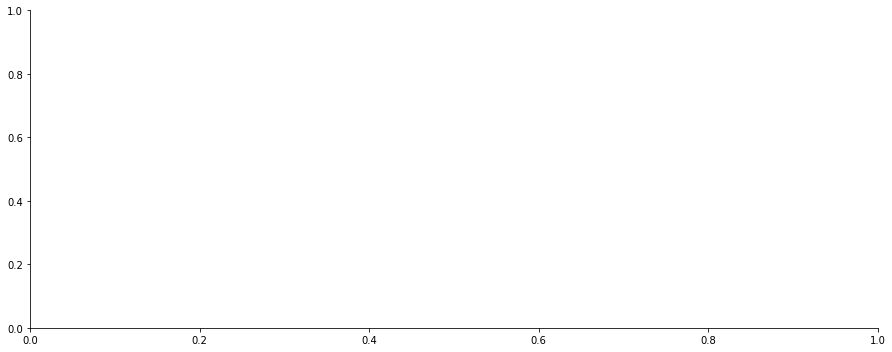

In [47]:
lm = sns.lmplot('vitimas', 'tipo', data=df, aspect=2.5, order=3)
lm.ax.set_xlabel('vitimas')

In [ ]:
#tipo_category = ['COLISÃO', 'ABALROAMENTO LONGITUDINAL', 'ABALROAMENTO TRANSVERSAL', 'CHOQUE VEÍCULO PARADO', 'ATROPELAMENTO', 'CHOQUE OBJETO FIXO', 'CHOQUE', 'TOMBAMENTO', 'ENGAVETAMENTO','CAPOTAMENTO', 'ACID. DE PERCURSO', 'SEMÁFORO', 'QUEDA', 'ATROPELAMENTO ANIMAL', 'ALAGAMENTO']

def setCategoryColumns(column, categors):
  return column.astype(CategoricalDtype(categories=categors, ordered=True)).cat.codes

#df.tipo = setCategoryColumns(df.tipo, tipo_category)
df.ano.value_counts()

In [ ]:
vitimas_c_f = df.query('tipo == "COLISÃO"')
vitimas_c_f

In [ ]:
vitimas_c_f = df.query('tipo == "COLISÃO"')
sns.relplot(x="natureza_acidente",y="velocidade_max_via",data=vitimas_c_f);

#Machine Learning

## Random forest classifier [ Vitima fatal x Com vitima]

               tipo     tempo_clima  ... situacao_placa velocidade_max_via
0           COLISÃO             Bom  ...  Não há placas      Não há placas
1           COLISÃO             Bom  ...         Outras      Não há placas
2           COLISÃO             Bom  ...  Não há placas      Não há placas
3           COLISÃO             Bom  ...         Outras      Não há placas
4           COLISÃO             Bom  ...         Outras      Não há placas
...             ...             ...  ...            ...                ...
670         COLISÃO         Chuvoso  ...  Não há placas      Não há placas
1101  ATROPELAMENTO  Sem informação  ...  Não há placas      Não há placas
1118          QUEDA             Bom  ...  Não há placas      Não há placas
1175  ATROPELAMENTO             Bom  ...  Não há placas      Não há placas
1269         CHOQUE             Bom  ...  Não há placas      Não há placas

[101 rows x 9 columns]
     natureza_acidente
0           COM VITÍMA
1           COM VITÍMA
2      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0 é igual a: Com vítima
1 é igual a: Sem vítima


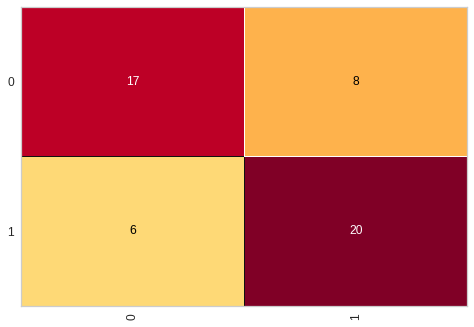

In [ ]:

import sklearn
#Separando uma amostra do data frame
vitimas_n = vitimas_n.loc[0:57]
# Unindo as amostras de vitimas fatais x com vitimas 
test_acidentes = pd.concat([vitimas_n, vitimas_f], axis=0)
#separando as features
features = [	'tipo'	,'tempo_clima',	'situacao_semaforo',	'sinalizacao'	,'condicao_via'	,'conservacao_via'	,'ponto_controle',	'situacao_placa',	'velocidade_max_via'	]

acidente = test_acidentes.loc[:,["natureza_acidente"]]

x = test_acidentes[features]
y = acidente.iloc[:]
print(x)
print(y)

from sklearn.preprocessing import LabelEncoder

#aplicando o label encoder
x = x.apply(LabelEncoder().fit_transform)
y = y.apply(LabelEncoder().fit_transform)

#--- aplicando o one hot encoder ---
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

x =OneHotEncoder().fit_transform(x).toarray()

#--- aplicando o StandardScaler ---
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)



from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=999
)

# utilizando o decisison Tree
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train,y_train)

predict = model.predict(x)
mean_absolute_error(y,predict)
val_predictions = model.predict(X_test)
print(f"Erro absoluto usando apenas Decision Tree {mean_absolute_error(y_test,val_predictions)}:")
print()
print("PREDICTIONS AND TARGER USING DECISION TREE")
print()
print("predictions", val_predictions[:5])
print("target", y_test[:5])
print()


# usando o Random Forest para melhorar os resultados

from sklearn.ensemble import RandomForestClassifier

#usando o random_state = 1 para que o algoritmo mantenha os dados ao rodar
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
melb_preds = forest_model.predict(X_test)
print()
print(print("Erro absoluto usando Random Forest Classifier ", mean_absolute_error(y_test,melb_preds)))
print()
print("PREDICTIONS AND TARGER USING RANDOM FOREST")
print()
print("predictions", val_predictions[:5])
print("target", melb_preds[:5])
print()
acuracia1 = accuracy_score(y_test, melb_preds) * 100
print("Acurácia: " , acuracia1)  # acertos ao todo
print()
print()
print(classification_report(y_test,melb_preds))

from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(forest_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
print('0 é igual a: Com vítima\n1 é igual a: Sem vítima') 

## Random Forest Classifier [com vitimas X sem vitimas]

In [ ]:
import sklearn
vitimas = df.copy()
vitimas
df_remove = vitimas[ vitimas['natureza_acidente'] == 'VÍTIMA FATAL' ].index

vitimas.drop(df_remove, inplace = True)
vitimas[vitimas['natureza_acidente'] == 'COM VITÍMA']

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NOROESTE
5,2019-01-01 09:30:00,COM VITÍMA,IBURA,AV DOIS RIOS,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,30 km/h,2019,SUL
6,2019-01-01 09:54:00,COM VITÍMA,SAN MARTIN,AV GENERAL SAN MARTIN,CHOQUE OBJETO FIXO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Outros,R-6a,40 km/h,2019,SUDOESTE
9,2019-01-01 16:01:00,COM VITÍMA,CAMPO GRANDE,EST DE BELEM,ATROPELAMENTO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,NORTE
12,2019-01-01 20:30:00,COM VITÍMA,ESTÂNCIA,AV DR JOSE RUFINO,COLISÃO,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Outras,Não há placas,2019,SUDOESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2021-07-31 09:14:00,COM VITÍMA,CAXANGÁ,AV CAXANGA,COLISÃO,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Chuvoso,Não existe,Perfeito estado,Molhada,Perfeito estado,Não existe,Não há placas,Não há placas,2021,OESTE
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NOROESTE
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,SUL
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NORTE


                   bairro  ... velocidade_max_via
0                   IPSEP  ...            60 km/h
1              BOA VIAGEM  ...      Não há placas
2              BOA VIAGEM  ...      Não há placas
3             IMBIRIBEIRA  ...      Não há placas
4                JAQUEIRA  ...            40 km/h
...                   ...  ...                ...
1313               GRAÇAS  ...      Não há placas
1314          IMBIRIBEIRA  ...      Não há placas
1315         CAMPO GRANDE  ...      Não há placas
1316  ALTO JOSÉ BONIFÁCIO  ...      Não há placas
1317            ÁGUA FRIA  ...      Não há placas

[17359 rows x 11 columns]
     natureza_acidente
0           SEM VITÍMA
1           SEM VITÍMA
2           SEM VITÍMA
3           SEM VITÍMA
4           COM VITÍMA
...                ...
1313        COM VITÍMA
1314        COM VITÍMA
1315        COM VITÍMA
1316        COM VITÍMA
1317        SEM VITÍMA

[17359 rows x 1 columns]
Erro absoluto usando apenas Decision Tree 0.31900921658986175:

PREDICT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Erro absoluto usando Random Forest Classifier  0.2736175115207373
None

PREDICTIONS AND TARGER USING RANDOM FOREST

predictions [1 1 0 1 1]
target [1 1 1 1 1]

Acurácia:  72.63824884792626


              precision    recall  f1-score   support

           0       0.54      0.28      0.36      2466
           1       0.76      0.91      0.83      6214

    accuracy                           0.73      8680
   macro avg       0.65      0.59      0.59      8680
weighted avg       0.70      0.73      0.69      8680

0 é igual a: Com vítima
1 é igual a: Sem vítima


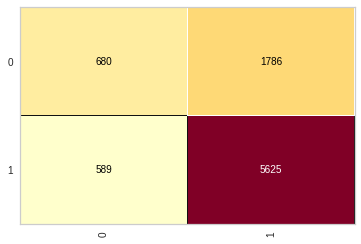

In [ ]:

features = [	'bairro',	'endereco',	'tipo'	,'tempo_clima',	'situacao_semaforo',	'sinalizacao'	,'condicao_via'	,'conservacao_via'	,'ponto_controle',	'situacao_placa',	'velocidade_max_via'	]

acidente = vitimas.loc[:,["natureza_acidente"]]



x = vitimas[features]
y = acidente.iloc[:]
print(x)
print(y)
from sklearn.preprocessing import LabelEncoder

#gerando variaveis para chamar no encoder
x = x.apply(LabelEncoder().fit_transform)
y = y.apply(LabelEncoder().fit_transform)

#--- inicio do one hot encoder ---
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


x =OneHotEncoder().fit_transform(x).toarray()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=999
)

model = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
model.fit(X_train,y_train)

predict = model.predict(x)
mean_absolute_error(y,predict)
val_predictions = model.predict(X_test)
print(f"Erro absoluto usando apenas Decision Tree {mean_absolute_error(y_test,val_predictions)}:")
print()
print("PREDICTIONS AND TARGER USING DECISION TREE")
print()
print("predictions", val_predictions[:5])
print("target", y_test[:5])
print()
acuracia = classification_report(y_test, val_predictions) 
print(acuracia)# acertos ao todo

# usando o Random Forest para melhorar os resultados

from sklearn.ensemble import RandomForestClassifier

#usando o random_state = 1 para que o algoritmo mantenha os dados ao rodar
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
melb_preds = forest_model.predict(X_test)
print()
print(print("Erro absoluto usando Random Forest Classifier ", mean_absolute_error(y_test,melb_preds)))
print()
print("PREDICTIONS AND TARGER USING RANDOM FOREST")
print()
print("predictions", val_predictions[:5])
print("target", melb_preds[:5])
print()
acuracia1 = accuracy_score(y_test, melb_preds) * 100
print("Acurácia: " , acuracia1)  # acertos ao todo
print()
print()
print(classification_report(y_test,melb_preds))

%matplotlib inline

# plt.figure(figsize=(10,4))
# sn.heatmap(confusion_matrix(y_test, melb_preds), annot=True)
# plt.xlabel('True Positive')
# plt.ylabel('False Positive')
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(forest_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
print('0 é igual a: Com vítima\n1 é igual a: Sem vítima') 

# Random Forest Para Identificar Acidente Fatal

In [ ]:
df.loc[(df['situacao_semaforo'] == 'Nublado'), 'rpa'] = 2.3

In [ ]:
df.rpa.value_counts()

0.9    12265
0.5     3496
4.2     1445
4.6       85
3.7       56
2.1       21
0         17
3.2       16
3         12
1.5       11
0.2        9
1.8        9
2          9
1          9
5          6
4          6
Name: rpa, dtype: int64

In [107]:
#tentando aplicar o random forest


natureza_category = ['COM VITÍMA','VÍTIMA FATAL', 'SEM VÍTIMA']

value = df[(df['natureza_acidente'] == 'SEM VITÍMA')].index
df.drop(value, inplace=True)
tempo_category = ['Bom','Sem informação','Chuvoso','Nublado']
semaforo_category = ['Não existe', 'Sem defeito', 'Intermitente ', 'Com defeito', 'Desligado', 'Bom', 'Nublado']
sinalizacao_category = ['Perfeito estado', 'Não existente', 'Incompleta ', 'Ilegível', 'Sem defeito']
condicao_via_category = ['Seca', 'Outros', 'Molhada ', 'Oleosa', 'Perfeito estado', 'Ilegível']
conservacao_via_category = ['Perfeito estado', 'Outros', 'Mal conservada ', 'Mal iluminada', 'Seca', 'Molhada']
ano_category = ["2019", 2020, 2021]

def setCategoryColumns(column, categors):
  return column.astype(CategoricalDtype(categories=categors, ordered=True)).cat.codes

df.natureza_acidente = setCategoryColumns(df.natureza_acidente, natureza_category)
df.tempo_clima = setCategoryColumns(df.tempo_clima, tempo_category)
df.situacao_semaforo = setCategoryColumns(df.situacao_semaforo, semaforo_category)
#df.sinalizacao = setCategoryColumns(df.sinalizacao, sinalizacao_category)
#df.condicao_via = setCategoryColumns(df.condicao_via, condicao_via_category)
#df.conservacao_via = setCategoryColumns(df.conservacao_via, conservacao_via_category)
df.ano = setCategoryColumns(df.ano, ano_category)

0    1802
1     305
2      43
Name: ano, dtype: int64

In [ ]:

# para modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
!pip install --upgrade category_encoders
import category_encoders as ce

In [ ]:
features = ["sinalizacao", "ano", "condicao_via"]
acidente = "natureza_acidente"

In [ ]:
X = df[features]
y = df[acidente]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999
)

In [ ]:
cat_feature = ["sinalizacao", "condicao_via"]
num_feature = ["ano"]


encoder = ce.OneHotEncoder(cols=cat_feature)

X_train = encoder.fit_transform(X_train)

X_train.head()

,sinalizacao_1,sinalizacao_2,sinalizacao_3,sinalizacao_4,ano,condicao_via_1,condicao_via_2,condicao_via_3,condicao_via_4,condicao_via_5
11113,1,0,0,0,0,1,0,0,0,0
4502,0,1,0,0,0,0,1,0,0,0
1541,0,0,1,0,1,1,0,0,0,0
3960,0,1,0,0,0,0,1,0,0,0
7010,1,0,0,0,0,0,0,1,0,0


In [ ]:
X_test = encoder.transform(X_test)

X_test.head()

,sinalizacao_1,sinalizacao_2,sinalizacao_3,sinalizacao_4,ano,condicao_via_1,condicao_via_2,condicao_via_3,condicao_via_4,condicao_via_5
1707,1,0,0,0,1,1,0,0,0,0
9747,1,0,0,0,0,1,0,0,0,0
2377,1,0,0,0,1,0,0,1,0,0
4893,1,0,0,0,0,1,0,0,0,0
4212,1,0,0,0,0,1,0,0,0,0


In [ ]:
classificador = RandomForestClassifier()
classificador.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#previsao (passando os testes)
y_pred = classificador.predict(X_test)

y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int8)

In [ ]:
#Algoritmo para excontrar os melhores parametros para um melhor resultado do treinamento
param_grid = {
    "max_depth": [4, 5, 6],
    "max_features": ["auto", "sqrt"],
    "n_estimators": [20, 50, 100]
}

cf = RandomForestClassifier()
cf_cv = GridSearchCV(estimator=cf, param_grid=param_grid, cv=3)
cf_cv.fit(X_train, y_train)

cf_cv.best_params_

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50}

In [ ]:
from sklearn.metrics import accuracy_score, recall_score

print("Acurácia: " + str(accuracy_score(y_test, y_pred)))  # acertos ao todo

print(recall_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix

print("Matriz de Confusão : \n" + str(confusion_matrix(y_test, y_pred)))

Acurácia: 0.6022304832713755
0.7760416666666666
Matriz de Confusão : 
[[201 299]
 [129 447]]


In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 50, max_depth=6)
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Text(105.0, 0.5, 'False Positive')

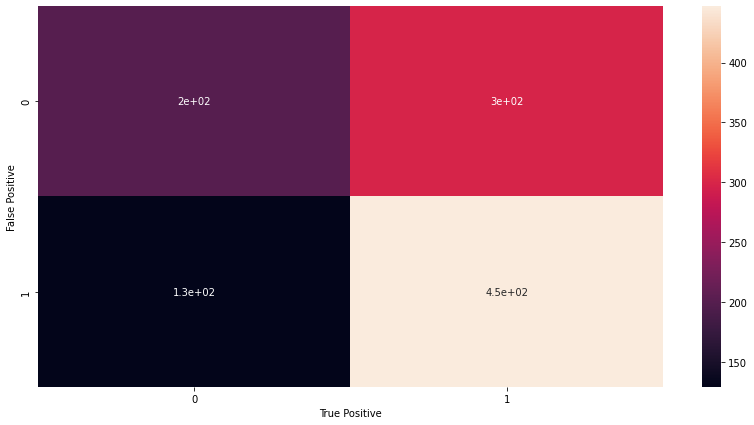

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(14,7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('True Positive')
plt.ylabel('False Positive')

# Tentando gerar gráficos para analisar os bairros

In [ ]:
df

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
0,2019-01-01 00:41:00,SEM VITÍMA,IPSEP,AV RECIFE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019,SUL
1,2019-01-01 01:37:00,SEM VITÍMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,Não há placas,2019,SUL
2,2019-01-01 14:20:00,SEM VITÍMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
3,2019-01-01 02:53:00,SEM VITÍMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NOROESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NOROESTE
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,SUL
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NORTE
1316,2021-07-31 20:19:00,COM VITÍMA,ALTO JOSÉ BONIFÁCIO,RUA ALTO JOSE BONIFACIO,COLISÃO,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NOROESTE


In [ ]:
graph = px.treemap(vitimas_f, path = [px.Constant("REGIÕES"),'rpa','tipo', 'bairro', 'ano'],
                  color='rpa', color_discrete_map={'(?)':'lightgrey', 'SUL':'navy', 'NOROESTE':'darkblue','NORTE':'blue', 'OESTE':'royalblue', 'CENTRO':'reflexblue','SUDOESTE':'midnightblue'}
                  )


graph

In [ ]:
graph_bairros = px.treemap(df, path = [px.Constant("REGIÕES"),'rpa', 'bairro','tipo','natureza_acidente'],color='rpa', color_discrete_map={'(?)':'lightgrey', 'SUL':'navy', 'NOROESTE':'darkblue','NORTE':'blue', 'OESTE':'royalblue', 'CENTRO':'reflexblue','SUDOESTE':'midnightblue',0: 'gold'})
graph_bairros

### Analise de vitimas fatais por região

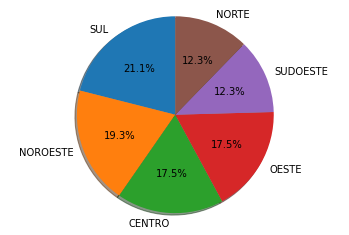

In [92]:
regioes = ['SUL', 'NOROESTE', 'CENTRO', 'OESTE','SUDOESTE','NORTE']
mortes = df.loc[(df['natureza_acidente'] == 'VÍTIMA FATAL')]
labels = list(regioes)
sizes = mortes.rpa.value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
df_vitimas = df.loc[(df['natureza_acidente'] == 'COM VITÍMA') | ((df['natureza_acidente'] == 'VÍTIMA FATAL'))].copy()
df_vitimas

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NOROESTE
5,2019-01-01 09:30:00,COM VITÍMA,IBURA,AV DOIS RIOS,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,30 km/h,2019,SUL
6,2019-01-01 09:54:00,COM VITÍMA,SAN MARTIN,AV GENERAL SAN MARTIN,CHOQUE OBJETO FIXO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Outros,R-6a,40 km/h,2019,SUDOESTE
9,2019-01-01 16:01:00,COM VITÍMA,CAMPO GRANDE,EST DE BELEM,ATROPELAMENTO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,NORTE
12,2019-01-01 20:30:00,COM VITÍMA,ESTÂNCIA,AV DR JOSE RUFINO,COLISÃO,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Não existe,Outras,Não há placas,2019,SUDOESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2021-07-31 09:14:00,COM VITÍMA,CAXANGÁ,AV CAXANGA,COLISÃO,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Chuvoso,Não existe,Perfeito estado,Molhada,Perfeito estado,Não existe,Não há placas,Não há placas,2021,OESTE
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NOROESTE
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,SUL
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NORTE


In [ ]:


graph_bairros_parallel = px.parallel_categories(df_vitimas, dimensions=['rpa','situacao_semaforo','conservacao_via', 'natureza_acidente'],             
                labels={'rpa':'Regiões', 'situacao_semaforo':'Condição do semaforo', 'conservacao_via':'Conservação da via', 'natureza_acidente':'Tipo de acidente'})
graph_bairros_parallel.show()


In [ ]:
graph_bairros_parallel = px.parallel_categories(df, dimensions=['auto','tempo_clima'])
graph_bairros_parallel.show()

# K-means (classificar os acidentes com vitimas)

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

In [ ]:
plt.scatter(df.ano,df['natureza_acidente'])
plt.xlabel('ano')
plt.ylabel('natureza_acidente')

Text(0, 0.5, 'natureza_acidente')

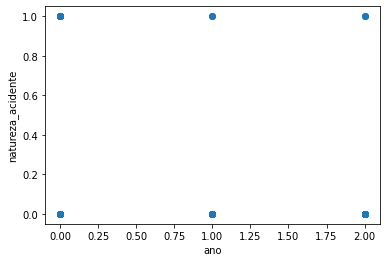

In [108]:
# Categorizando possíveis colunas para o K-means

dfnatureza= df.loc[:,["natureza_acidente"]]
dfn = dfnatureza.apply(LabelEncoder().fit_transform)
plt.scatter(df.ano,dfn)
plt.xlabel('ano')
plt.ylabel('natureza_acidente')

In [ ]:
df.cluster.value_counts()

0    11427
2     4419
1     1626
Name: cluster, dtype: int64

Text(0, 0.5, 'natureza_acidente')

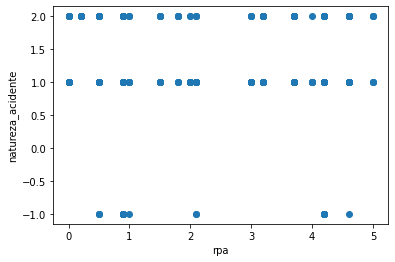

In [ ]:
plt.scatter(df.rpa,df['natureza_acidente'])
plt.xlabel('rpa')
plt.ylabel('natureza_acidente')

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['rpa','natureza_acidente']])
y_predicted

array([0, 0, 0, ..., 2, 2, 0], dtype=int32)

In [ ]:
km.cluster_centers_

array([[0.80289665, 0.99142382],
       [4.18720787, 1.32533825],
       [0.84123105, 2.        ]])

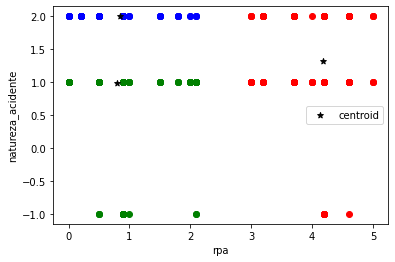

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.rpa,df1['natureza_acidente'],color='green')
plt.scatter(df2.rpa,df2['natureza_acidente'],color='red')
plt.scatter(df3.rpa,df3['natureza_acidente'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('rpa')
plt.ylabel('natureza_acidente')
plt.legend()

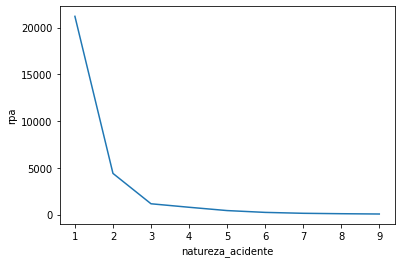

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['natureza_acidente','rpa']])
    sse.append(km.inertia_)
plt.xlabel('natureza_acidente')
plt.ylabel('rpa')
plt.plot(k_rng,sse)

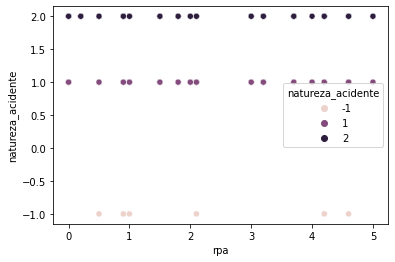

In [ ]:
sns.scatterplot(data=df, x='rpa', y='natureza_acidente', hue='natureza_acidente')

In [ ]:
from pandas.api.types import CategoricalDtype

def setCategoryColumns(column, categors):
  return column.astype(CategoricalDtype(categories=categors, ordered=True)).cat.codes
#df2 = df.head(1000)
#vitimas_f = df2.query('natureza_acidente == "0"')
vitimas_f = pd.DataFrame(df, columns = ['rpa', 'condicao_via', 'conservacao_via', 'situacao_semaforo', 'vitimas_fatais', 'cluster'])
#vitimas_f

regioes_category = ['SUL','NOROESTE','CENTRO','OESTE','SUDOESTE','NORTE','0']
df.rpa = setCategoryColumns(df.rpa, regioes_category)
#regioes_category = ['VITIMA FATAL', 'SEM VITÍMA', 'COM VITÍMA']
#df.natureza_acidente = setCategoryColumns(df.natureza_acidente, regioes_category)


#sb.pairplot(vitimas_f, hue="rpa")
df.rpa.value_counts()


 0    4704
 1    3174
 2    2903
 3    2900
 4    2061
 5    1481
-1     249
Name: rpa, dtype: int64

In [ ]:
X = np.array(vitimas_f.drop('rpa',axis = 1))

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0)

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 3, 1, 4, 3, 0, 3, 0, 0, 5, 5, 5, 4, 0, 0, 1, 3, 3, 0,
       3, 1, 0, 0, 3, 3, 0, 1, 1, 5, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 3, 3,
       0, 1, 1, 3, 1, 1, 0, 3, 3, 0, 0, 0, 1, 3, 0, 2, 4, 3, 1, 5, 0, 1,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 1, 0, 1, 0, 0,
       3, 0, 1, 0, 0, 0, 3, 3, 4, 0, 0, 1, 1, 0, 0, 1, 3, 0, 0, 0, 3, 2,
       0, 0, 0, 0, 0, 3, 0, 0, 1, 4, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 3, 0, 0, 0, 5, 6, 0, 3, 5, 3, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 3,
       1, 0, 1, 3, 1, 0, 5, 1, 1, 0, 0, 5, 0, 4, 3, 3, 0, 5, 5, 5, 3, 0,
       1, 3, 5, 3, 3, 0, 1, 1, 1, 0, 3, 0, 0, 0, 1, 3, 3, 0, 1, 0, 1, 3,
       3, 0, 3, 3, 3, 0, 0, 0, 1, 0, 3, 1, 1, 1, 3, 0, 3, 0, 3, 1, 0, 0,
       0, 0, 2, 0, 4, 0, 3, 0, 1, 4, 3, 3, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1,
       5, 0, 0, 3, 0, 1, 0, 3, 1, 1, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 1, 0,
       0, 0, 0, 1, 0, 3, 0, 5, 5, 4, 1, 3, 0, 0, 3, 3, 1, 3, 1, 3, 0, 0,
       3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 4, 4, 5, 5,

In [ ]:
vitimas_f['K-classes'] = kmeans.labels_

ValueError: ignored

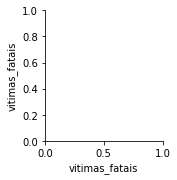

In [ ]:
sb.pairplot(vitimas_f,hue='rpa')

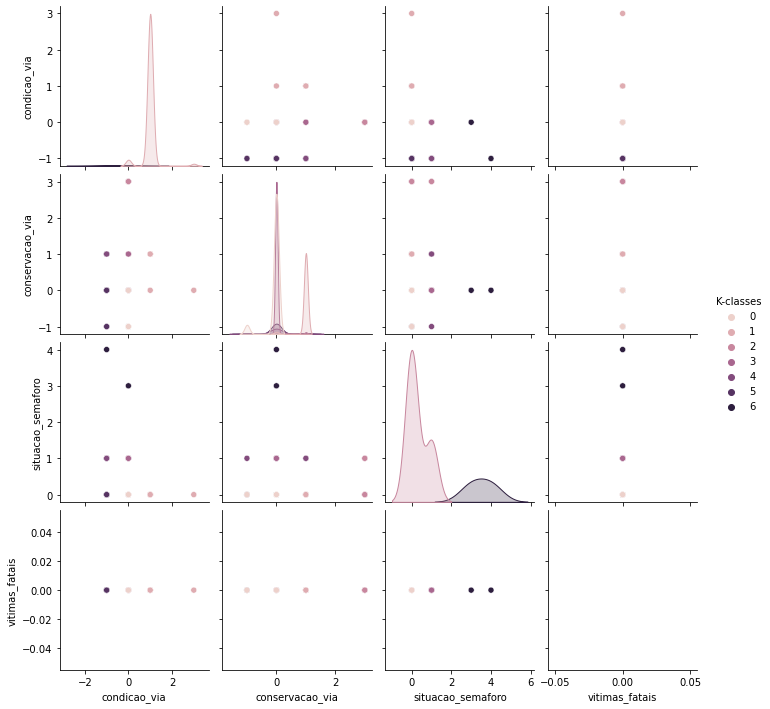

In [ ]:
sb.pairplot(vitimas_f,hue='K-classes')

In [ ]:
df_2019["vitimas"] = pd.to_numeric(df_2019["vitimas"], downcast='integer')
df_2019["vitimas_fatais"] = pd.to_numeric(df_2019["vitimas_fatais"], downcast='integer')
df_2019.loc[(df_2019['auto'] == 'COLISÃO TRASEIRA'), 'auto'] = 0.0
df_2019.loc[(df_2019['natureza_acidente'] == 'ENTRADA E SAÍDA') | (df_2019['natureza_acidente'] == 'APOIO'), 'natureza_acidente'] = 'VÍTIMA FATAL'
df_2019.loc[(df_2019['auto'] == 'COLISÃO FRONTAL'), 'auto'] = 0.0
df_2019.loc[(df_2019['auto'] == 'ABALROAMENTO TRANSVERSAL'), 'auto'] = 0.0
df_2019.loc[(df_2019['auto'] == 'ABALROAMENTO LONGITUDINAL'), 'auto'] = 0.0

df_2019["auto"] = pd.to_numeric(df_2019["auto"], downcast='integer')
df_2019["outros"] = pd.to_numeric(df_2019["outros"], downcast='integer')
df_2019["moto"] = pd.to_numeric(df_2019["moto"], downcast='integer')


#observando K-means
ata = pd.DataFrame(df_2019, columns = ['natureza_acidente', 'vitimas', 'moto', 'vitimas_fatais', 'auto', 'outros'])
#sb.pairplot(ata, hue="natureza_acidente")
df_2019


,data,hora,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano
0,01/01/2019,00:41:00,SEM VÍTIMA,IPSEP,AV RECIFE,COLISÃO TRASEIRA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019
1,01/01/2019,01:37:00,SEM VÍTIMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,2019
2,01/01/2019,14:20:00,SEM VÍTIMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,01/01/2019,02:53:00,SEM VÍTIMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,01/01/2019,08:17:00,COM VÍTIMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO COM CICLISTA,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12057,31/12/2019,13:37:00,SEM VÍTIMA,VÁRZEA,AV AFONSO OLINDENSE,COLISÃO,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
12058,31/12/2019,13:39:00,SEM VÍTIMA,BOA VIAGEM,RUA TENENTE DOMINGOS DE BRITO,COLISÃO,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
12059,31/12/2019,14:30:00,SEM VÍTIMA,CASA AMARELA,RUA XAVANTES,ABALROAMENTO TRANSVERSAL,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Placas Pare,40 km/h,2019
12060,31/12/2019,15:40:00,SEM VÍTIMA,BARRO,RUA DA ESPERANCA,COLISÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
X = np.array(ata.drop('natureza_acidente', axis = 1))

In [ ]:
X

array([[ 0., nan, nan,  2., nan],
       [ 0., nan, nan,  2., nan],
       [ 0., nan, nan,  2., nan],
       ...,
       [ 0., nan, nan,  2., nan],
       [ 0., nan, nan,  2., nan],
       [ 2., nan, nan,  1., nan]])

### **Análise de vítimas fatais por região**

#Feature Importance

Feature: 0, Score: 0.19002
Feature: 1, Score: 0.06061
Feature: 2, Score: 0.05916
Feature: 3, Score: 0.09328
Feature: 4, Score: 0.04666
Feature: 5, Score: 0.08114
Feature: 6, Score: 0.46913


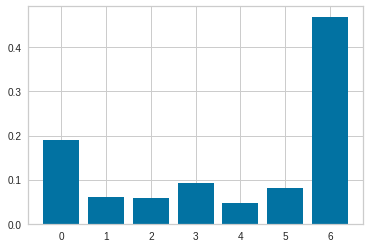

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=7, n_informative=2, n_redundant=2, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
features = ["sinalizacao", "ano", "condicao_via", "situacao_semaforo", "tempo_clima",  "conservacao_via"]
acidente = "natureza_acidente"

X = df[features]
y = df[acidente]

Feature: 0, Score: 0.59504
Feature: 1, Score: 0.00648
Feature: 2, Score: 0.14380
Feature: 3, Score: 0.01102
Feature: 4, Score: 0.00736
Feature: 5, Score: 0.01508
Feature: 6, Score: 0.22122


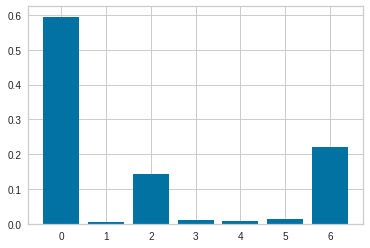

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=7, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

FEATURE IMPORTANCE


In [ ]:
df
df_feature_importance = df.copy()

df_feature_importance

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
0,2019-01-01 00:41:00,SEM VITÍMA,IPSEP,AV RECIFE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019,SUL
1,2019-01-01 01:37:00,SEM VITÍMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,Não há placas,2019,SUL
2,2019-01-01 14:20:00,SEM VITÍMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
3,2019-01-01 02:53:00,SEM VITÍMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NOROESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NOROESTE
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,SUL
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NORTE
1316,2021-07-31 20:19:00,COM VITÍMA,ALTO JOSÉ BONIFÁCIO,RUA ALTO JOSE BONIFACIO,COLISÃO,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NOROESTE


In [ ]:
 drops = df_feature_importance[df_feature_importance['natureza_acidente'] == 'VÍTIMA FATAL'].index

 df_feature_importance.drop(drops, inplace=True)

In [ ]:
features = [	'bairro',	'endereco',	'tipo'	,'tempo_clima',	'situacao_semaforo',	'sinalizacao'	,'condicao_via'	,'conservacao_via'	,'ponto_controle',	'situacao_placa',	'velocidade_max_via'	]
# acidente = df.loc[:,["natureza_acidente"]]

acidente = df_feature_importance.loc[:,["natureza_acidente"]]


# x_feat = vitimas.iloc[:, 15:20].values

x = df_feature_importance[features]
y = acidente.iloc[:]
print(x)
print(y)

                   bairro  ... velocidade_max_via
0                   IPSEP  ...            60 km/h
1              BOA VIAGEM  ...      Não há placas
2              BOA VIAGEM  ...      Não há placas
3             IMBIRIBEIRA  ...      Não há placas
4                JAQUEIRA  ...            40 km/h
...                   ...  ...                ...
1313               GRAÇAS  ...      Não há placas
1314          IMBIRIBEIRA  ...      Não há placas
1315         CAMPO GRANDE  ...      Não há placas
1316  ALTO JOSÉ BONIFÁCIO  ...      Não há placas
1317            ÁGUA FRIA  ...      Não há placas

[17359 rows x 11 columns]
     natureza_acidente
0           SEM VITÍMA
1           SEM VITÍMA
2           SEM VITÍMA
3           SEM VITÍMA
4           COM VITÍMA
...                ...
1313        COM VITÍMA
1314        COM VITÍMA
1315        COM VITÍMA
1316        COM VITÍMA
1317        SEM VITÍMA

[17359 rows x 1 columns]


In [ ]:
x = x.apply(LabelEncoder().fit_transform)
y = y.apply(LabelEncoder().fit_transform)

In [ ]:
x

,bairro,endereco,tipo,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via
0,50,141,12,0,3,3,4,3,3,2,5
1,12,1249,1,0,3,3,4,3,1,2,7
2,12,63,12,3,3,2,2,2,3,2,7
3,49,72,12,3,3,2,2,2,3,2,7
4,52,1518,12,0,3,3,4,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...
1313,42,75,12,0,4,3,4,3,1,28,7
1314,49,105,12,0,4,3,4,3,1,28,7
1315,22,1335,12,0,3,3,4,3,3,2,7
1316,3,319,12,0,3,2,4,3,3,2,7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature: 0, Score: 23.16833
Feature: 1, Score: 33.02443
Feature: 2, Score: 13.94835
Feature: 3, Score: 2.49402
Feature: 4, Score: 2.94258
Feature: 5, Score: 3.62946
Feature: 6, Score: 1.47924
Feature: 7, Score: 2.03510
Feature: 8, Score: 5.68140
Feature: 9, Score: 7.56004
Feature: 10, Score: 4.03705


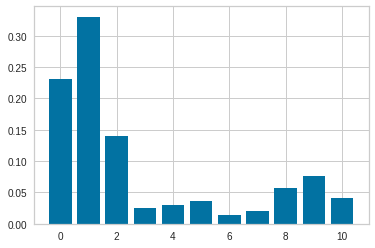

0-bairro
1-endereco
2-tipo
3-tempo_clima
4-situacao_semaforo
5-sinalizacao
6-condicao_via
7-conservacao_via
8-ponto_controle
9-situacao_placa
10-velocidade_max_via


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
model = RandomForestClassifier()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v*100))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
print('0-bairro\n1-endereco\n2-tipo\n3-tempo_clima\n4-situacao_semaforo\n5-sinalizacao\n6-condicao_via\n7-conservacao_via\n8-ponto_controle\n9-situacao_placa\n10-velocidade_max_via')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Feature: 0, Score: 20.17318
Feature: 1, Score: 29.62122
Feature: 2, Score: 13.67722
Feature: 3, Score: 4.01445
Feature: 4, Score: 3.61360
Feature: 5, Score: 4.41291
Feature: 6, Score: 1.77284
Feature: 7, Score: 2.41277
Feature: 8, Score: 6.37948
Feature: 9, Score: 9.30977
Feature: 10, Score: 4.61255


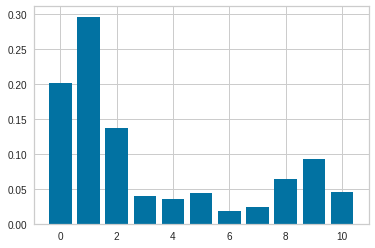

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v*100))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
df_feature_importance

,data,natureza_acidente,bairro,endereco,tipo,auto,moto,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimas_fatais,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,ano,rpa
0,2019-01-01 00:41:00,SEM VITÍMA,IPSEP,AV RECIFE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,2019,SUL
1,2019-01-01 01:37:00,SEM VITÍMA,BOA VIAGEM,RUA PADRE BERNADINO PESSOA,ABALROAMENTO TRANSVERSAL,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,Não há placas,2019,SUL
2,2019-01-01 14:20:00,SEM VITÍMA,BOA VIAGEM,AV ENGENHEIRO DOMINGOS FERREIRA,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
3,2019-01-01 02:53:00,SEM VITÍMA,IMBIRIBEIRA,AV GENERAL MAC ARTHUR,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sem informação,Não existe,Não existente,Outros,Outros,Não existe,Não há placas,Não há placas,2019,SUL
4,2019-01-01 08:17:00,COM VITÍMA,JAQUEIRA,RUA TITO ROSAS,COLISÃO,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,40 km/h,2019,NOROESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2021-07-31 14:30:00,COM VITÍMA,GRAÇAS,AV GOVERNADOR AGAMENON MAGALHAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,NOROESTE
1314,2021-07-31 15:39:00,COM VITÍMA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,COLISÃO,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,Não há placas,2021,SUL
1315,2021-07-31 16:24:00,COM VITÍMA,CAMPO GRANDE,RUA PROFESSOR FRANCISCO DA TRINDADE,COLISÃO,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Bom,Não existe,Perfeito estado,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NORTE
1316,2021-07-31 20:19:00,COM VITÍMA,ALTO JOSÉ BONIFÁCIO,RUA ALTO JOSE BONIFACIO,COLISÃO,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,Não há placas,2021,NOROESTE
